### Step 1: Install and import Required Libraries

In [4]:
!pip install pandas scikit-learn matplotlib seaborn
!pip install preprocess-kgptalkie
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=68a73ad2fc158508427a029ec1ba192c94781c64e9f344fa2512e16021f453b0
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [5]:
from sklearn.model_selection import train_test_split  # For train-test split
from sklearn.feature_extraction.text import TfidfVectorizer  # For TF-IDF vectorization
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  # Evaluation metrics
import pandas as pd
import preprocess_kgptalkie as ps  # For text preprocessing
import pickle  # For saving models
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Plotting


### Step 2: Load and Preprocess the Dataset

In [3]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])
df

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...


In [4]:
# Select needed columns and name these columns
df = df[[2, 3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']

# Displaying the first few rows
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


<Axes: ylabel='count'>

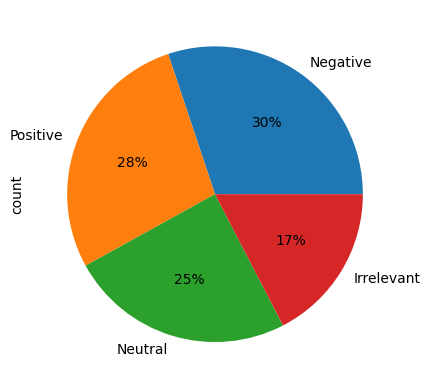

In [5]:
# Data Visualization

df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [6]:
# Data Cleaning: lowercase, remove URLs, HTML tags, punctuations, and retweets
df['text'] = df['text'].fillna('')  # Handle missing values
df['text'] = df['text'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

df.head()

/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/text_preprocess.py:92: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text()


,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
# Check class distribution
print(df['sentiment'].value_counts())


sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64


### Step 3: Train-Test Split

In [12]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


In [13]:
X_train.shape, X_test.shape

((60545,), (15137,))

### Step 4: Text Vectorization (TF-IDF)

In [15]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')


In [16]:
# Transform the data
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform on training data
X_test_tfidf = vectorizer.transform(X_test) # Transform test data


### Step 5: Train the Models

I will compare four machine learning models: Naive Bayes, Decision Tree, SVM, and Random Forest.

In [21]:
# Store models and results in a dictionary
models = {}
results = {}

### 1. Naive Bayes Classifier

In [22]:
# Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_predictions = nb.predict(X_test_tfidf)
results['Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, nb_predictions),
    'confusion_matrix': confusion_matrix(y_test, nb_predictions),
    'classification_report': classification_report(y_test, nb_predictions, output_dict=True)
}
models['Naive Bayes'] = nb


### 2. Decision Tree Classifier

In [23]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)
dt_predictions = dt.predict(X_test_tfidf)
results['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, dt_predictions),
    'confusion_matrix': confusion_matrix(y_test, dt_predictions),
    'classification_report': classification_report(y_test, dt_predictions, output_dict=True)
}
models['Decision Tree'] = dt


### 3. Support Vector Machine (SVM)

In [24]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
svm_predictions = svm.predict(X_test_tfidf)
results['SVM'] = {
    'accuracy': accuracy_score(y_test, svm_predictions),
    'confusion_matrix': confusion_matrix(y_test, svm_predictions),
    'classification_report': classification_report(y_test, svm_predictions, output_dict=True)
}
models['SVM'] = svm


### 4. Random Forest Classifier

In [25]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
rf_predictions = rf.predict(X_test_tfidf)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, rf_predictions),
    'confusion_matrix': confusion_matrix(y_test, rf_predictions),
    'classification_report': classification_report(y_test, rf_predictions, output_dict=True)
}
models['Random Forest'] = rf


### Save all models

In [ ]:
for model_name, model in models.items():
    with open(f'{model_name}_model.pkl', 'wb') as file:
        pickle.dump(model, file)


In [ ]:
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

### Step 6: Evaluate and Display Results

In [27]:
# Display results for each model
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(result['classification_report'])

Model: Naive Bayes
Accuracy: 0.7257
{'Irrelevant': {'precision': 0.9471476510067114, 'recall': 0.4398130112972341, 'f1-score': 0.6006916733173716, 'support': 2567.0}, 'Negative': {'precision': 0.6528782636049072, 'recall': 0.9081163859111792, 'f1-score': 0.7596303412938055, 'support': 4571.0}, 'Neutral': {'precision': 0.8439349112426036, 'recall': 0.6021108179419525, 'f1-score': 0.7028025870033877, 'support': 3790.0}, 'Positive': {'precision': 0.7010034814663116, 'recall': 0.8132573057733429, 'f1-score': 0.7529696436427629, 'support': 4209.0}, 'accuracy': 0.7257052256061307, 'macro avg': {'precision': 0.7862410768301334, 'recall': 0.6908243802309272, 'f1-score': 0.704023561314332, 'support': 15137.0}, 'weighted avg': {'precision': 0.7640002332148664, 'recall': 0.7257052256061307, 'f1-score': 0.7165962112898795, 'support': 15137.0}}
Model: Decision Tree
Accuracy: 0.7895
{'Irrelevant': {'precision': 0.8026905829596412, 'recall': 0.6973120373977405, 'f1-score': 0.7462997706900146, 'suppor

Model: Naive Bayes
Accuracy: 0.73
{'Irrelevant': {'precision': 0.9471476510067114, 'recall': 0.4398130112972341, 'f1-score': 0.6006916733173716, 'support': 2567.0}, 'Negative': {'precision': 0.6528782636049072, 'recall': 0.9081163859111792, 'f1-score': 0.7596303412938055, 'support': 4571.0}, 'Neutral': {'precision': 0.8439349112426036, 'recall': 0.6021108179419525, 'f1-score': 0.7028025870033877, 'support': 3790.0}, 'Positive': {'precision': 0.7010034814663116, 'recall': 0.8132573057733429, 'f1-score': 0.7529696436427629, 'support': 4209.0}, 'accuracy': 0.7257052256061307, 'macro avg': {'precision': 0.7862410768301334, 'recall': 0.6908243802309272, 'f1-score': 0.704023561314332, 'support': 15137.0}, 'weighted avg': {'precision': 0.7640002332148664, 'recall': 0.7257052256061307, 'f1-score': 0.7165962112898795, 'support': 15137.0}}


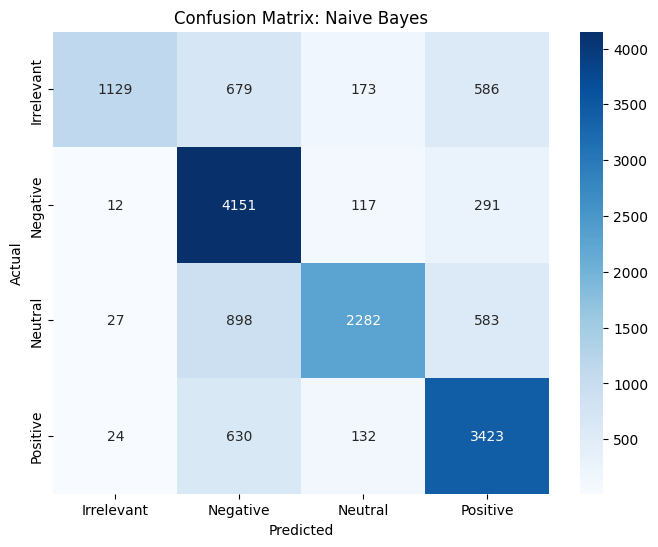

Model: Decision Tree
Accuracy: 0.79
{'Irrelevant': {'precision': 0.8026905829596412, 'recall': 0.6973120373977405, 'f1-score': 0.7462997706900146, 'support': 2567.0}, 'Negative': {'precision': 0.8380782918149466, 'recall': 0.824327280682564, 'f1-score': 0.8311459137531708, 'support': 4571.0}, 'Neutral': {'precision': 0.8070422535211268, 'recall': 0.7559366754617414, 'f1-score': 0.7806539509536785, 'support': 3790.0}, 'Positive': {'precision': 0.7257765891791812, 'recall': 0.8382038488952245, 'f1-score': 0.7779492833517089, 'support': 4209.0}, 'accuracy': 0.7895223624232014, 'macro avg': {'precision': 0.793396929368724, 'recall': 0.7789449606093175, 'f1-score': 0.7840122296871432, 'support': 15137.0}, 'weighted avg': {'precision': 0.7930796328891963, 'recall': 0.7895223624232014, 'f1-score': 0.789323280099676, 'support': 15137.0}}


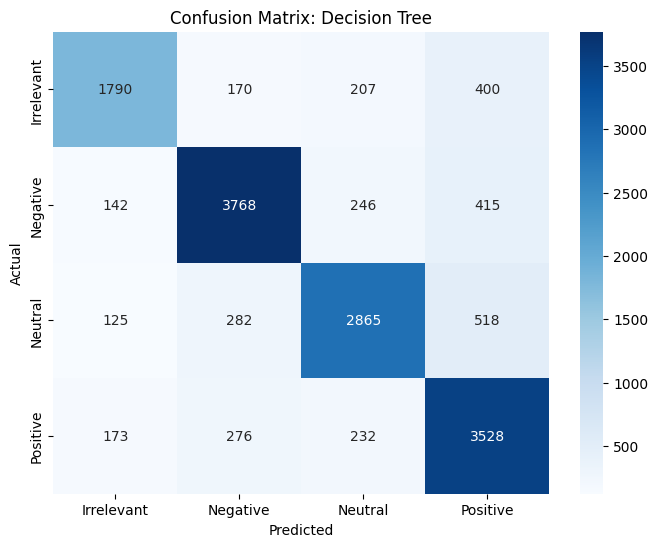

Model: SVM
Accuracy: 0.83
{'Irrelevant': {'precision': 0.8573928258967629, 'recall': 0.7635372029606544, 'f1-score': 0.8077477848753348, 'support': 2567.0}, 'Negative': {'precision': 0.8564324324324324, 'recall': 0.8665499890614745, 'f1-score': 0.8614615050021749, 'support': 4571.0}, 'Neutral': {'precision': 0.7817094443060055, 'recall': 0.8277044854881267, 'f1-score': 0.8040497244649494, 'support': 3790.0}, 'Positive': {'precision': 0.8371706622359364, 'recall': 0.8379662627702542, 'f1-score': 0.8375682735692235, 'support': 4209.0}, 'accuracy': 0.8314064874149435, 'macro avg': {'precision': 0.8331763412177843, 'recall': 0.8239394850701275, 'f1-score': 0.8277068219779207, 'support': 15137.0}, 'weighted avg': {'precision': 0.8325302334674278, 'recall': 0.8314064874149435, 'f1-score': 0.8313339778235415, 'support': 15137.0}}


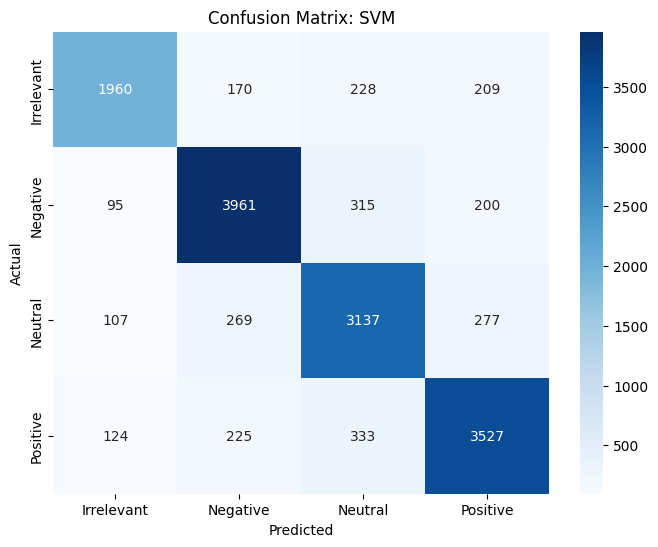

Model: Random Forest
Accuracy: 0.90
{'Irrelevant': {'precision': 0.9621451104100947, 'recall': 0.8317101675107129, 'f1-score': 0.8921855411617217, 'support': 2567.0}, 'Negative': {'precision': 0.922266139657444, 'recall': 0.9188361408882083, 'f1-score': 0.9205479452054794, 'support': 4571.0}, 'Neutral': {'precision': 0.9223410241980866, 'recall': 0.8649076517150396, 'f1-score': 0.8927015250544662, 'support': 3790.0}, 'Positive': {'precision': 0.8226611226611227, 'recall': 0.940128296507484, 'f1-score': 0.8774808737110544, 'support': 4209.0}, 'accuracy': 0.8964788267159939, 'macro avg': {'precision': 0.907353349231687, 'recall': 0.8888955641553612, 'f1-score': 0.8957289712831804, 'support': 15137.0}, 'weighted avg': {'precision': 0.9013515339755767, 'recall': 0.8964788267159939, 'f1-score': 0.8967906929446152, 'support': 15137.0}}


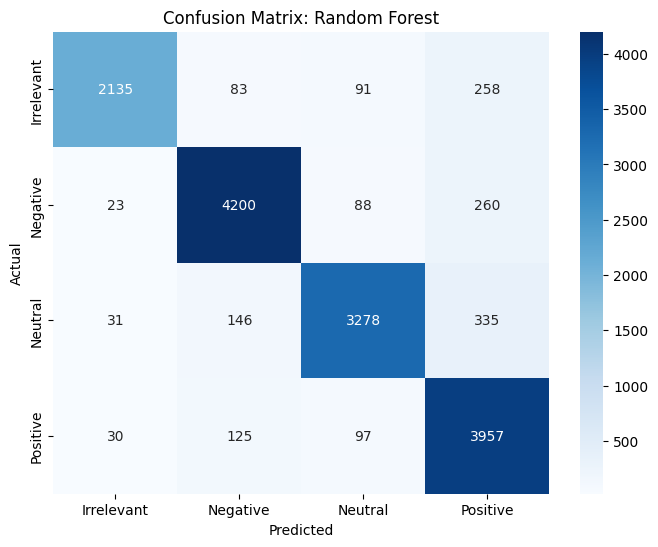

In [39]:
# Display results for each model
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(result['classification_report'])

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Irrelevant','Negative','Neutral', 'Positive'], yticklabels=['Irrelevant','Negative','Neutral', 'Positive'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### The result comparison table

In [41]:
# Create a comparison table for the models
comparison_table = pd.DataFrame({
    'Model': ['Naive Bayes', 'Decision Tree', 'SVM', 'Random Forest'],
    'Accuracy': [results['Naive Bayes']['accuracy'],
                 results['Decision Tree']['accuracy'],
                 results['SVM']['accuracy'],
                 results['Random Forest']['accuracy']]
})

# Display the comparison table
comparison_table


,Model,Accuracy
0,Naive Bayes,0.725705
1,Decision Tree,0.789522
2,SVM,0.831406
3,Random Forest,0.896479


### Inference  

In [9]:
def predict_sentiment(user_input):
    # Vectorize the user input
    vectorized_text = vectorizer.transform([user_input])

    # Predict the sentiment using the loaded model
    prediction = model.predict(vectorized_text)

    # Since the model seems to return the sentiment label directly, just return the prediction
    return prediction[0]

# Example usage
if __name__ == "__main__":
    user_input = input("Enter a sentence for sentiment analysis: ")
    sentiment = predict_sentiment(user_input)
    print(f"The predicted sentiment is: {sentiment}")



Enter a sentence for sentiment analysis: He is good.
The predicted sentiment is: Positive
